## Linear Regression - Data Generation

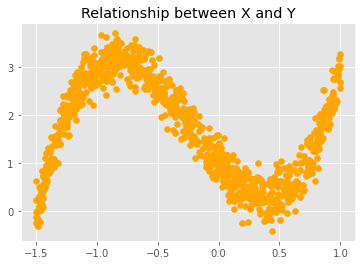

In [681]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x = []
y = []

# generate 1000 samples
for index in range(1000):
    x.append(random.uniform(-1.5, 1.0))
    N = np.random.normal(0.0, 0.25)
    y.append(3 * (x[index]**3) + 2 * (x[index]**2) - 3 *x[index] + 1 +N)
    
# sort them according to x
zipped_lists = zip(x, y)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
x, y = [ list(tuple) for tuple in  tuples]

# print scatter plot
plt.title('Relationship between X and Y')
plt.scatter(x, y,  color='orange')
plt.show()

In [682]:
# reshape x
x = np.array(x)
x = x.reshape(-1, 1)

## Linear Regression - Data Preprocessing

In [683]:
from sklearn.preprocessing import PolynomialFeatures

# build polynomial features k = 1, 2, 3, 4
poly_1 = PolynomialFeatures(degree = 1)
degree_1 = poly_1.fit_transform(x)
poly_2 = PolynomialFeatures(degree = 2)
degree_2 = poly_2.fit_transform(x)
poly_3 = PolynomialFeatures(degree = 3)
degree_3 = poly_3.fit_transform(x)
poly_4 = PolynomialFeatures(degree = 4)
degree_4 = poly_4.fit_transform(x)

In [684]:
degree_4

array([[ 1.        , -1.49972536,  2.24917615, -3.3731465 ,  5.05879333],
       [ 1.        , -1.49863168,  2.24589692, -3.36577228,  5.04405298],
       [ 1.        , -1.49681548,  2.24045659, -3.3535501 ,  5.01964571],
       ...,
       [ 1.        ,  0.99531663,  0.9906552 ,  0.98601559,  0.98139772],
       [ 1.        ,  0.99664738,  0.993306  ,  0.98997582,  0.98665681],
       [ 1.        ,  0.99789239,  0.99578923,  0.99369049,  0.99159618]])

## Linear Regression - Model Construction

In [685]:
from sklearn.linear_model import LinearRegression

# construct linear regression model for k = 1, 2, 3, 4
model_1 = LinearRegression(fit_intercept=False)
model_1.fit(degree_1, y)
model_2 = LinearRegression(fit_intercept=False)
model_2.fit(degree_2, y)
model_3 = LinearRegression(fit_intercept=False)
model_3.fit(degree_3, y)
model_4 = LinearRegression(fit_intercept=False)
model_4.fit(degree_4, y)

LinearRegression(fit_intercept=False)

In [686]:
# do prediction
pred_1 = model_1.predict(degree_1)
pred_2 = model_2.predict(degree_2)
pred_3 = model_3.predict(degree_3)
pred_4 = model_4.predict(degree_4)

## Linear Regression - Results

In [687]:
# get the associated coefficient and print equation
print("Coefficient 1: \n", model_1.coef_)
print("Equation: ", model_1.coef_[0], model_1.coef_[1],"x")

print("Coefficient 2: \n", model_2.coef_)
print("Equation: ", model_2.coef_[0], model_2.coef_[1],"x", "+", model_2.coef_[2], "x^2")

print("Coefficient 3: \n", model_3.coef_)
print("Equation: ", model_3.coef_[0], model_3.coef_[1],"x", "+", model_3.coef_[2], "x^2", "+", model_3.coef_[3], "x^3")

print("Coefficient 4: \n", model_4.coef_)
print("Equation: ", model_4.coef_[0], model_4.coef_[1],"x", "+", model_4.coef_[2], "x^2", "+", model_4.coef_[3], "x^3", "+", model_4.coef_[4], "x^4")

Coefficient 1: 
 [ 1.50890689 -0.56038947]
Equation:  1.5089068919123372 -0.560389466500106 x
Coefficient 2: 
 [ 1.6513927  -0.73259093 -0.3080855 ]
Equation:  1.6513926957975882 -0.732590931676465 x + -0.30808550213253755 x^2
Coefficient 3: 
 [ 0.99740975 -3.00523135  1.99320984  2.99607897]
Equation:  0.9974097529140371 -3.0052313480999304 x + 1.9932098424389169 x^2 + 2.9960789693583463 x^3
Coefficient 4: 
 [ 1.00020343 -3.01997118  1.97246192  3.01934132  0.0219028 ]
Equation:  1.0002034296324984 -3.0199711820909414 x + 1.9724619206725234 x^2 + 3.019341316641927 x^3 + 0.02190280480432394 x^4


In [688]:
# set precision to 2
coef_1 = np.around(model_1.coef_, 2)
coef_2 = np.around(model_2.coef_, 2)
coef_3 = np.around(model_3.coef_, 2)
coef_4 = np.around(model_4.coef_, 2)

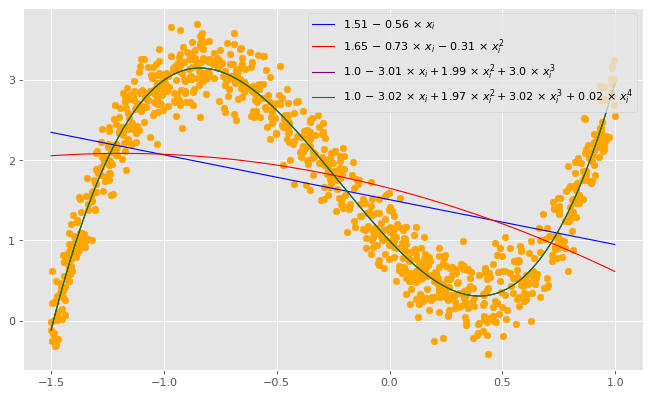

In [689]:
from matplotlib.pyplot import figure

# print plot
figure(figsize=(10, 6), dpi=80)

plt.scatter(x, y, color="orange")
plt.plot(degree_1[:,1], pred_1,color="blue", linewidth=1, label = str(coef_1[0])+' $-$ '+str(-coef_1[1])+r' $\times$ '+'$x_i$')
plt.plot(degree_2[:,1], pred_2, color="red", linewidth=1, label = str(coef_2[0])+' $-$ '+str(-coef_2[1])+r' $\times$ '+'$x_i$'+' $-$ '+str(-coef_2[2])+r' $\times$ '+'$x_i^2$')
plt.plot(degree_3[:,1], pred_3, color="purple", linewidth=1, label = str(coef_3[0])+' $-$ '+str(-coef_3[1])+r' $\times$ '+'$x_i+$'+str(coef_3[2])+r' $\times$ '+'$x_i^2+$'+str(coef_3[3])+r' $\times$ '+'$x_i^3$')
plt.plot(degree_3[:,1], pred_3, color="green", linewidth=1, label = str(coef_4[0])+' $-$ '+str(-coef_4[1])+r' $\times$ '+'$x_i+$'+str(coef_4[2])+r' $\times$ '+'$x_i^2+$'+str(coef_4[3])+r' $\times$ '+'$x_i^3$'+' $+$ '+str(coef_4[4])+r' $\times$ '+'$x_i^4$')

plt.legend()
plt.show()

## Logistic Regression - Data Generation

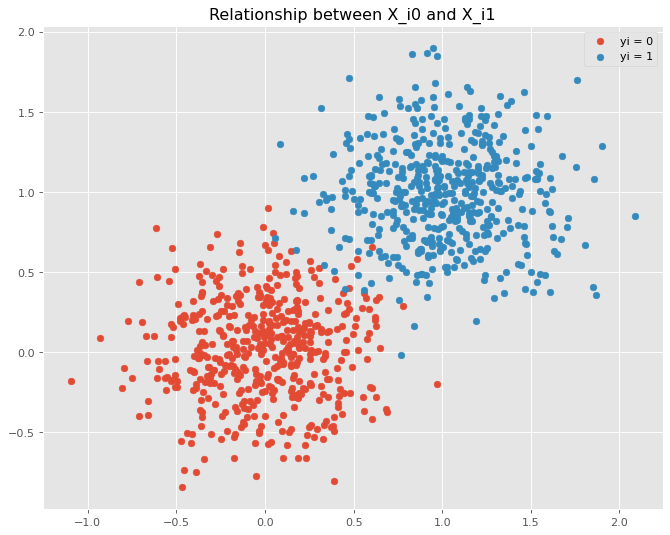

In [690]:
x_i0 = []
x_i1 = []
y_i = []

# generate 1000 sample points
for index in range(1000):
    y = random.randint(0, 1)
    y_i.append(y)
    mean = (y, y)
    cov = [[0.1, 0], [0, 0.1]]
    x, x_ = np.random.multivariate_normal(mean, cov)
    x_i0.append(x)
    x_i1.append(x_)

# print scatter plot
plt.style.use('ggplot')
figure(figsize=(10, 8), dpi=80)

plt.title('Relationship between X_i0 and X_i1')      
        
df = pd.DataFrame(dict(x_i0=x_i0, x_i1=x_i1, label=y_i))
groups = df.groupby('label')

for name, group in groups:
    plt.scatter(group.x_i0, group.x_i1, label='yi = '+ str(name))
    
plt.legend()
plt.show()

## Logistic Regression - Model Construction

In [691]:
# convert list to array
x_i0 = np.array(x_i0)
x_i1 = np.array(x_i1)

In [692]:
# merge x_i0 & x_i1
x_i = np.vstack((x_i0, x_i1))
x_i = x_i.T

In [693]:
from sklearn import linear_model

# build logistic regression model
model_5 = linear_model.LogisticRegression()
model_5.fit(x_i, y_i)

LogisticRegression()

In [694]:
# print score
print('Score of logistic regression:', model_5.score(x_i, y_i))
coef_5 = np.hstack((model_5.intercept_[:,None], model_5.coef_))
coef_5 = np.around(coef_5, 1)

Score of logistic regression: 0.988


In [695]:
# convert list to array
y_i = np.array(y_i)

In [696]:
from IPython.display import display, Math, Latex

# print latex form of weight and corresponding terms
display(Math(r'y_i = L(' + str(coef_5[0][0])+r' + '+ str(coef_5[0][1])+r'\times '+ r'x_{i0}'+r' + ' + str(coef_5[0][2])+r'\times '+ r'x_{i1}'+ r')'))

<IPython.core.display.Math object>

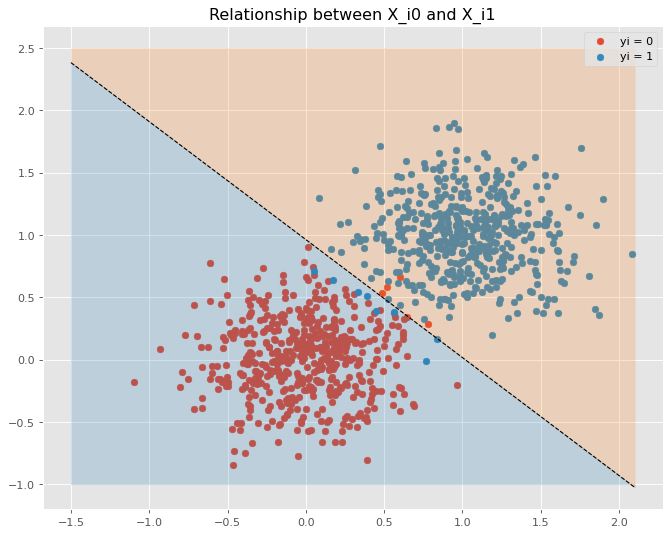

In [699]:
# print plot
plt.style.use('ggplot')
figure(figsize=(10, 8), dpi=80)

plt.title('Relationship between X_i0 and X_i1')      
        
df = pd.DataFrame(dict(x_i0=x_i0, x_i1=x_i1, label=y_i))
groups = df.groupby('label')

for name, group in groups:
    plt.scatter(group.x_i0, group.x_i1, label='yi = '+ str(name))
    
# Retrieve the model parameters.
b = model_5.intercept_[0]
w1, w2 = model_5.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 2.1
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
    
plt.legend()
plt.show()